# Binary Classification of Iris Assignment

In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()
data1 = pd.DataFrame(data = data.data, columns = data.feature_names)
data1['Species'] = pd.Series(data.target)
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Extract virgicolor and virginica ; sepal_length and petal_length from the data.
- Under species column: 0 - represents iris setosa, 1 - represents iris virgicolor and 2 - represents iris virginica
- All the three species have equal samples of 50 each
- Virgicolor and virginica represent the last 100 samples

In [40]:
# we extract sepal length and petal length for virgicolor(virgicolor samples are from row 50 - 99) and virginica (virginica samples from row 100 - 149)
data2 = data1.loc[50:149, ['sepal length (cm)','petal length (cm)','Species']] # the last 100 samples
data2

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### Question 2: Data Analysis

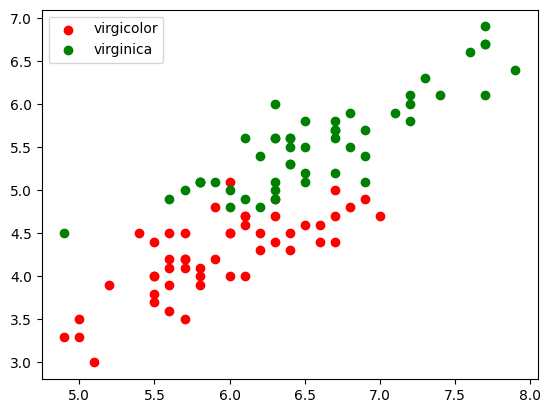

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data2.iloc[:50,0],data2.iloc[:50,1],color='red',label = 'virgicolor')
ax.scatter(data2.iloc[50:,0],data2.iloc[50:,1],color='green', label = 'virginica')
plt.legend()
plt.show()

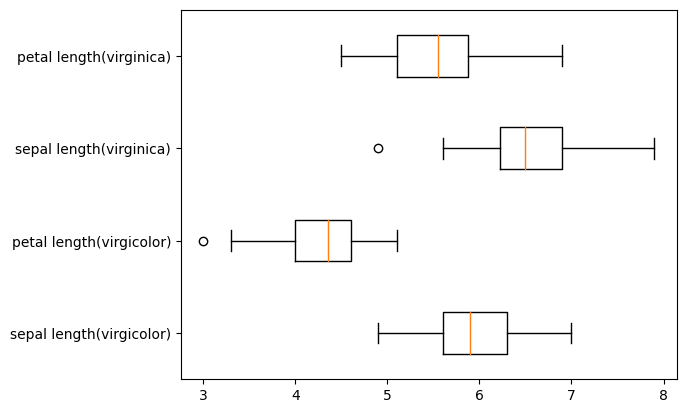

In [47]:
# boxplot
fig, ax = plt.subplots()
labels = ['sepal length(virgicolor)', 'petal length(virgicolor)', 'sepal length(virginica)','petal length(virginica)']
ax.boxplot((data2.iloc[:50,0],data2.iloc[:50,1],data2.iloc[50:,0],data2.iloc[50:,1]),labels = labels,vert = False)
plt.show()

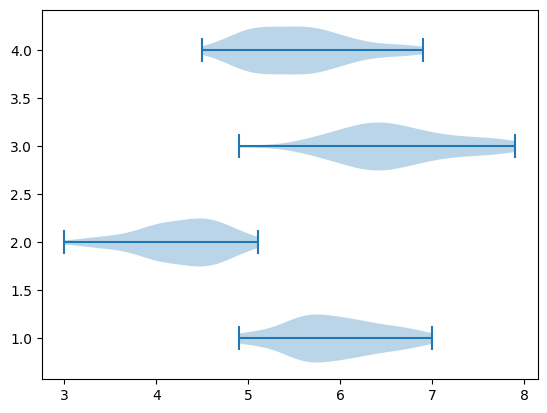

In [48]:
# violin plot
fig, ax = plt.subplots()
ax.violinplot((data2.iloc[:50,0],data2.iloc[:50,1],data2.iloc[50:,0],data2.iloc[50:,1]),vert = False)
plt.show()

### Problem 3: Division of preprocessing/training data and validation data

In [54]:
# creating explanatory data X
data3 = data2.drop('Species', axis = 'columns')
X = data3.to_numpy() # converting data3 to ndarray and assigning X
print(X.shape)


(100, 2)


In [57]:
# creating objective variable y
data4 = data2.iloc[:,2]
y = data4.to_numpy() # converting data4 to ndarray and assigning y
print(y.shape)

(100,)


In [58]:
# splitting data into training and validation data(75% training and 25% testing)
from sklearn.model_selection import train_test_split #splitting module
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)


In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


### Problem 4: Preprocessing and Standardization

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)



StandardScaler()


In [63]:
scaler.mean_ # mean

array([6.28266667, 4.94533333])

In [64]:
  scaler.scale_ # variance

array([0.67258176, 0.84998719])

In [67]:
scaler.transform(X_train) # standardized variables

array([[ 0.91785619,  0.18196353],
       [ 2.10730267,  1.35845185],
       [-1.60971756, -1.22982246],
       [ 0.02577134,  0.77020769],
       [-0.27159028, -0.40628063],
       [-0.27159028, -1.11217362],
       [ 0.62049458,  0.77020769],
       [-0.42027109,  0.18196353],
       [-0.42027109,  0.06431469],
       [-0.27159028,  0.77020769],
       [ 0.17445215,  0.65255885],
       [ 0.62049458,  0.29961236],
       [ 0.32313296,  0.29961236],
       [ 0.76917539,  0.65255885],
       [-0.42027109, -1.11217362],
       [-0.5689519 , -0.17098297],
       [ 0.91785619,  0.53491002],
       [ 0.02577134, -0.6415783 ],
       [ 1.36389862,  1.35845185],
       [ 0.17445215, -0.52392946],
       [ 0.62049458,  0.88785652],
       [-0.5689519 , -0.87687596],
       [ 1.36389862,  1.00550535],
       [-1.01499432, -1.58276895],
       [ 0.32313296,  1.00550535],
       [-1.01499432, -0.52392946],
       [ 0.76917539, -0.17098297],
       [-0.7176327 ,  0.18196353],
       [-0.86631351,

In [73]:
X_train_scaled = scaler.transform(X_train ) #assign standardized variables to X_train_scaled
print(X_train_scaled.mean(axis=0)) 
X_test_scaled = scaler.transform(X_test)#assign standardized variables to X_test_scaled
print(X_test_scaled.mean(axis=0)) 

[ 1.41812488e-15 -1.90514271e-15]
[-0.12290947 -0.18510083]


In [ ]:
# after standardization the mean is almost zero

In [72]:
print(X_train_scaled.std(axis=0))

[1. 1.]


In [ ]:
# after standardization the standard deviation is one

In [74]:
#assign X_train and X_test to standardized data (X_train_scaled and X_test_scaled)
X_train = X_train_scaled
X_test = X_test_scaled

### Question 5: Learning and Estimation

In [109]:
# 5-nn
from sklearn.neighbors import KNeighborsClassifier
classifier5 = KNeighborsClassifier(n_neighbors = 5) # 5 is also the default
classifier5.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
y_pred5 = classifier5.predict(X_test)
y_pred5

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

[[13  0]
 [ 4  8]]


In [113]:
# 3 -nn
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 3) # 3 nearest neighbors
classifier3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [114]:
y_pred3 = classifier3.predict(X_test)
y_pred3

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

[[13  0]
 [ 4  8]]


In [116]:
# 1-nn
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 1) # 3 nearest neighbors
classifier1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [121]:
y_pred1 = classifier1.predict(X_test)
y_pred1

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1])

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

[[13  0]
 [ 3  9]]


In [ ]:
# There is different accuracy results with different kneighbor values

### Question 6: Evaluation

In [94]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.88

In [95]:
#precision score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred) # for precision score best value is 1 worst value is 0

0.8125

In [97]:
# recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred) #for recall_score best value is 1 worst value is 0

1.0

In [98]:
# f1_score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred) # its best value is 1 worst score 0

0.896551724137931

In [99]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 3,  9]], dtype=int64)

### Question 7: Visualization

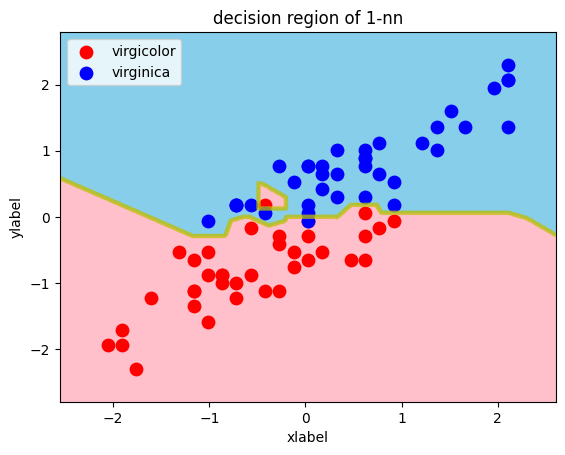

In [124]:
# visualizing 1-nn neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of 1-nn', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,classifier1.fit(X_train, y_train))


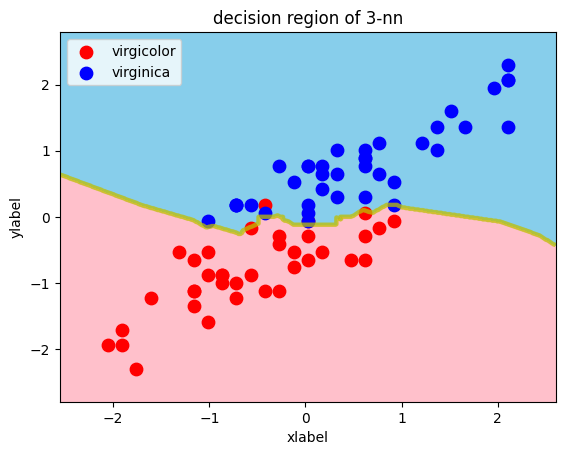

In [125]:
# Visualizing 3-nn neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of 3-nn', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,classifier3.fit(X_train, y_train))


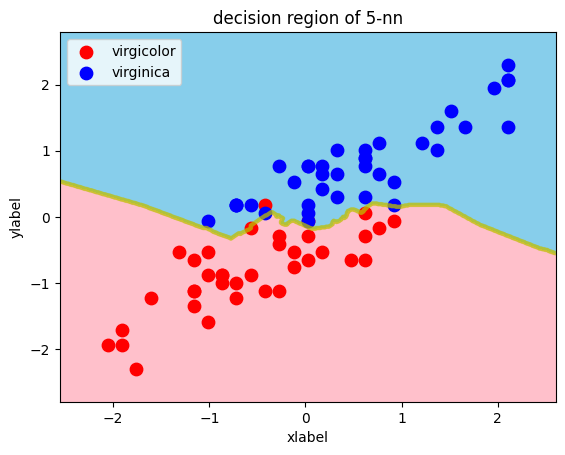

In [126]:
# visualizing 5-nn neighbors 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of 5-nn', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,classifier5.fit(X_train, y_train))

In [ ]:
# the results gets more accurate as nn neighbors increase

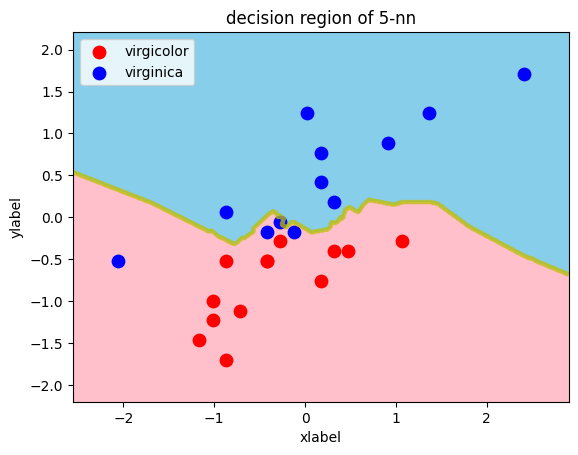

In [127]:
# plotting validation data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of 5-nn', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_test, y_test,classifier5.fit(X_train, y_train))

In [128]:
#from the validation data above we can see which feature were misclassified

### Question 8: Learning other methods
- We have already done the nearest method, we will go to next method(logistic regression)

#### Logistic regression

In [129]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression()

In [132]:
y_predL = LogReg.predict(X_test)
y_predL

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

In [133]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predL))
print(confusion_matrix(y_test, y_predL))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

[[13  0]
 [ 4  8]]


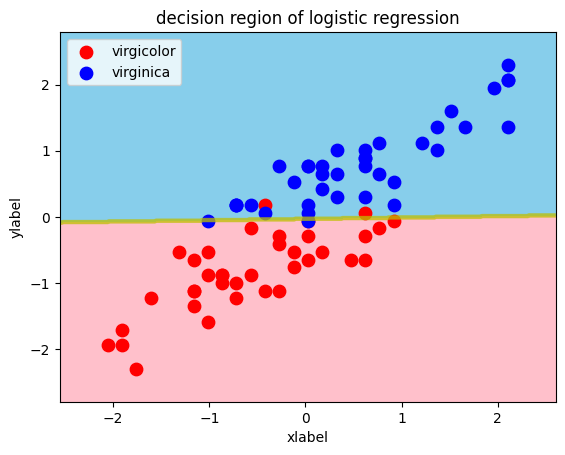

In [134]:
# visualizing data for logistic regression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of logistic regression', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,LogReg.fit(X_train, y_train))

#### SVM

In [135]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [136]:
y_predsvm = svm_model.predict(X_test)
y_predsvm

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1])

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predsvm))
print(confusion_matrix(y_test, y_predsvm))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

[[13  0]
 [ 3  9]]


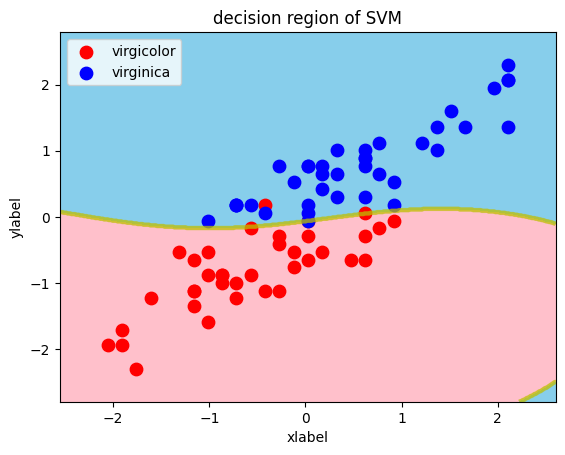

In [138]:
# visualizing data for SVM
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of SVM', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,svm_model.fit(X_train, y_train))

#### Decision Tree

In [139]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [140]:
y_predtree = tree.predict(X_test)
y_predtree

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1])

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predtree))
print(confusion_matrix(y_test, y_predtree))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

[[13  0]
 [ 3  9]]


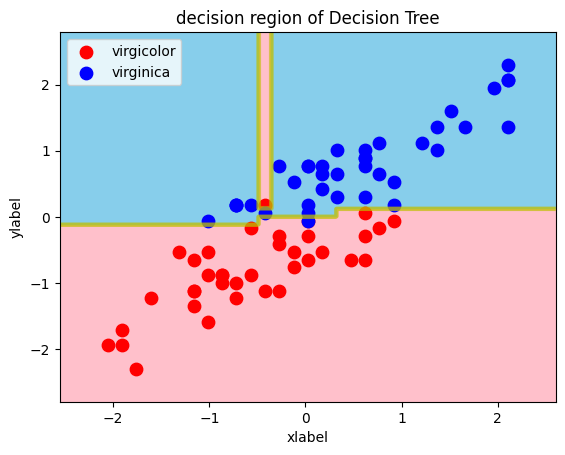

In [142]:
# visualizing data for Decision Tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of Decision Tree', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,tree.fit(X_train, y_train))

#### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
y_predforest = forest.predict(X_test)
y_predforest

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predforest))
print(confusion_matrix(y_test, y_predforest))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

[[13  0]
 [ 4  8]]


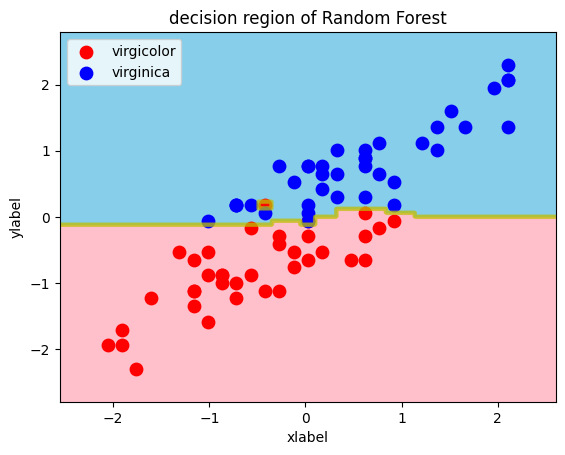

In [146]:
# visualizing data for Random Forest
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of Random Forest', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,forest.fit(X_train, y_train))

### Question 9: Comparison with and without standardization

In [147]:
# since we have already evaluated using standardized samples, we will use samples that are not standardized and compare the difference
# we will use X-n and y_n to denote non standardized data
# creating explanatory data X_n()
data3 = data2.drop('Species', axis = 'columns')
X_n = data3.to_numpy() # converting data3 to ndarray and assigning X_n
print(X_n.shape)

(100, 2)


In [148]:
# creating objective variable y
data4 = data2.iloc[:,2]
y_n = data4.to_numpy() # converting data4 to ndarray and assigning y
print(y_n.shape)

(100,)


In [150]:
# splitting data into training and validation data(75% training and 25% testing)
# nX_train, nX_test, ny_train, ny_test represents non standardized data to avoid confusion with standardized data
from sklearn.model_selection import train_test_split #splitting module
nX_train, nX_test, ny_train, ny_test = train_test_split(X_n, y_n, random_state=123, test_size=0.25)

In [151]:
print(nX_train.shape)
print(nX_test.shape)
print(ny_train.shape)
print(ny_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


#### method 1 : nearest neighbor

In [161]:
from sklearn.neighbors import KNeighborsClassifier
nclassifier5 = KNeighborsClassifier(n_neighbors = 5) # 5 is also the default
nclassifier5.fit(nX_train, ny_train)

KNeighborsClassifier()

In [162]:
ny_pred5 = nclassifier5.predict(nX_test)
ny_pred5

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ny_test, ny_pred5))
print(confusion_matrix(ny_test, ny_pred5))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

[[13  0]
 [ 4  8]]


In [ ]:
# both non standardized and standardized data appear similar in nearest neighbours

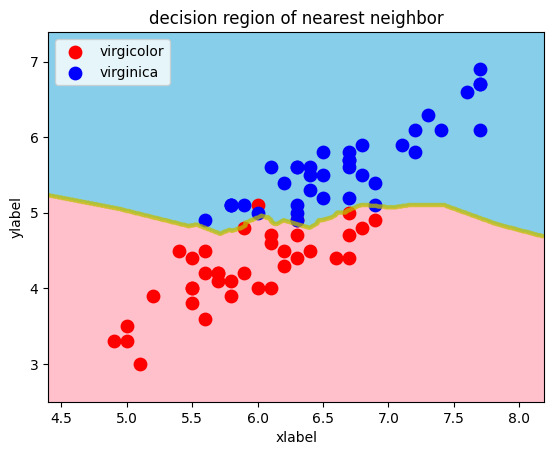

In [168]:
# visualizing data for non standardized nearest neighbour method
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(nX_train, ny_train,nclassifier5.fit(nX_train, ny_train))

#### Method 2 : Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
nLogReg = LogisticRegression()
nLogReg.fit(nX_train, ny_train)


LogisticRegression()

In [167]:
ny_predL = nLogReg.predict(nX_test)
ny_predL

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

In [169]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ny_test, ny_predL))
print(confusion_matrix(ny_test, ny_predL))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

[[13  0]
 [ 4  8]]


In [ ]:
# the data looks similar to non standardized data

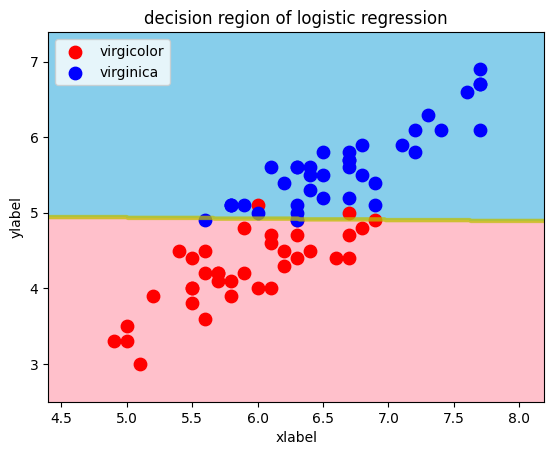

In [170]:
# visualizing data for non standardized logistic regression method
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of logistic regression', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(nX_train, ny_train,nLogReg.fit(nX_train, ny_train))

#### Method 3: SVM

In [171]:
from sklearn.svm import SVC
nsvm_model = SVC()
nsvm_model.fit(nX_train, ny_train)

SVC()

In [172]:
ny_predsvm = nsvm_model.predict(nX_test)
ny_predsvm

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1])

In [173]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ny_test, ny_predsvm))
print(confusion_matrix(ny_test, ny_predsvm))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

[[13  0]
 [ 3  9]]


In [ ]:
# the data looks similar to non standardized data

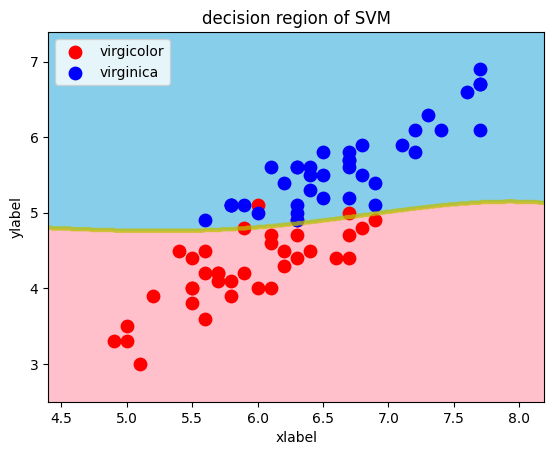

In [175]:
# visualizing data for non standardized SVM method
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of SVM', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(nX_train, ny_train,nsvm_model.fit(nX_train, ny_train))

#### Method 4 : Decision Tree

In [176]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
ntree = DecisionTreeClassifier()
ntree.fit(nX_train, ny_train)

DecisionTreeClassifier()

In [177]:
ny_predtree = ntree.predict(nX_test)
ny_predtree

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

In [178]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ny_test, ny_predtree))
print(confusion_matrix(ny_test, ny_predtree))

              precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

[[13  0]
 [ 4  8]]


In [ ]:
# The standardized data in decision tree is more accurate with higher precision than non standardized data

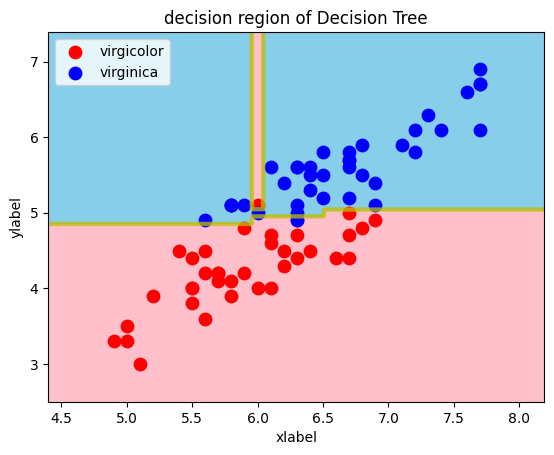

In [179]:
# visualizing data for non standardized Decision Tree method
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of Decision Tree', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(nX_train, ny_train,ntree.fit(nX_train, ny_train))

#### Method 5: Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
nforest = RandomForestClassifier()
nforest.fit(nX_train, ny_train)

RandomForestClassifier()

In [181]:
ny_predforest = nforest.predict(nX_test)
ny_predforest

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1])

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ny_test, ny_predforest))
print(confusion_matrix(ny_test, ny_predforest))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

[[13  0]
 [ 3  9]]


In [ ]:
# Values of standardized and non standardized data are slightly different

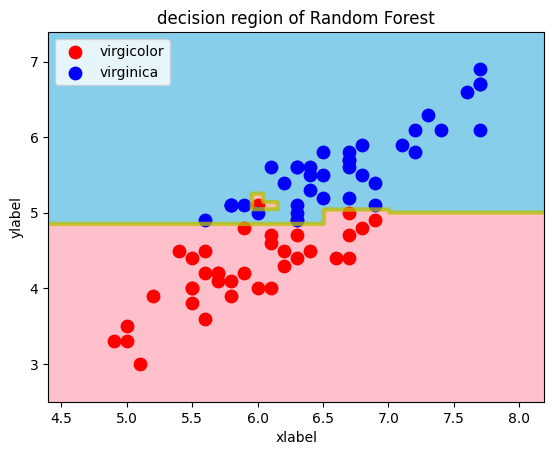

In [183]:
# visualizing data for non standardized Random Forest method
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of Random Forest', xlabel='xlabel', ylabel='ylabel', target_names=['virgicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(nX_train, ny_train,nforest.fit(nX_train, ny_train))

In [ ]:
# Normalization is very useful especially when the data you are using has huge variations and outliers

### Problem 10: Highly Accurate Method Using all Target Variables

In [185]:
# 1st we extract data again this time to include all the flower species
# we extract sepal length and petal length for all samples
data3 = data1[['sepal length (cm)','petal length (cm)','Species']]
data3

,sepal length (cm),petal length (cm),Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


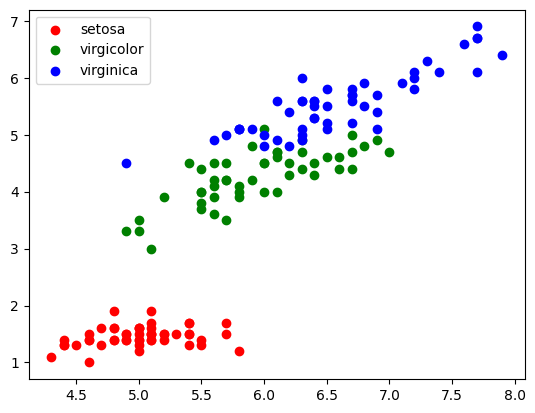

In [187]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data3.iloc[:50,0],data3.iloc[:50,1],color='red',label = 'setosa')
ax.scatter(data3.iloc[50:99,0],data3.iloc[50:99,1],color='green', label = 'virgicolor')
ax.scatter(data3.iloc[100:,0],data3.iloc[100:,1],color='blue', label = 'virginica')
plt.legend()
plt.show()

In [188]:
# creating explanatory data X
datax = data3.drop('Species', axis = 'columns')
X = datax.to_numpy() # converting data3 to ndarray and assigning X
print(X.shape)


(150, 2)


In [189]:
# creating objective variable y
datay = data3.iloc[:,2]
y = datay.to_numpy() # converting data4 to ndarray and assigning y
print(y.shape)

(150,)


In [190]:
# splitting data into training and validation data(75% training and 25% testing)
from sklearn.model_selection import train_test_split #splitting module
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25)

In [191]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
print(scaler)


StandardScaler()


In [193]:
X_train_scaled = scaler.transform(X_train ) #assign standardized variables to X_train_scaled
print(X_train_scaled.mean(axis=0)) 
X_test_scaled = scaler.transform(X_test)#assign standardized variables to X_test_scaled
print(X_test_scaled.mean(axis=0)) 

[-6.23509181e-15  2.77555756e-17]
[-0.10522186 -0.16719859]


In [194]:
#assign X_train and X_test to standardized data (X_train_scaled and X_test_scaled)
X_train = X_train_scaled
X_test = X_test_scaled

#### Method 1: Nearest Neighbors

In [195]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5) # 5 is also the default
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [196]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0])

In [197]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.64      0.88      0.74         8
           2       0.91      0.71      0.80        14

    accuracy                           0.87        38
   macro avg       0.85      0.86      0.85        38
weighted avg       0.89      0.87      0.87        38

[[16  0  0]
 [ 0  7  1]
 [ 0  4 10]]


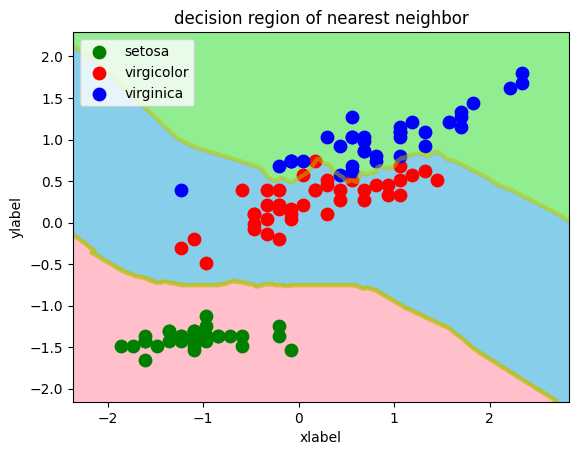

In [209]:
# visualizing data for nearest neighbour method for the 3 samples
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of nearest neighbor', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','virgicolor', 'virginica']):
    scatter_color = ['green', 'red','blue']
    contourf_color = ['pink', 'skyblue','lightgreen']
    n_class = 3
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,classifier.fit(X_train, y_train))

#### Method 2: Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression()

In [211]:
y_predL = LogReg.predict(X_test)
y_predL

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0])

In [212]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predL))
print(confusion_matrix(y_test, y_predL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.73      1.00      0.84         8
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.94      0.92      0.92        38

[[16  0  0]
 [ 0  8  0]
 [ 0  3 11]]


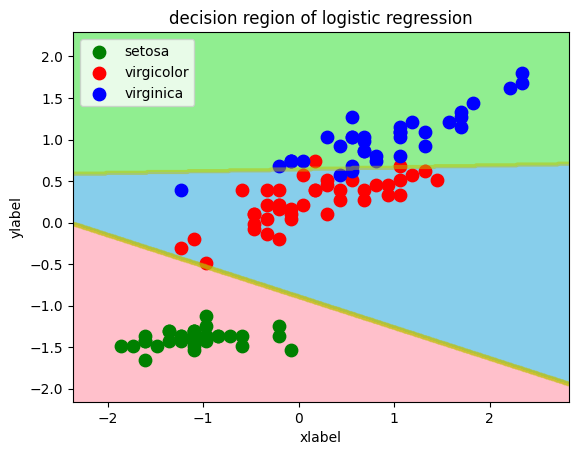

In [213]:
# visualizing data for logistic regression method for the 3 samples
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of logistic regression', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','virgicolor', 'virginica']):
    scatter_color = ['green', 'red','blue']
    contourf_color = ['pink', 'skyblue','lightgreen']
    n_class = 3
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,LogReg.fit(X_train, y_train))

#### Method 3: SVM

In [214]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [215]:
y_predsvm = svm_model.predict(X_test)
y_predsvm

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0])

In [216]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predsvm))
print(confusion_matrix(y_test, y_predsvm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.67      1.00      0.80         8
           2       1.00      0.71      0.83        14

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.88        38
weighted avg       0.93      0.89      0.90        38

[[16  0  0]
 [ 0  8  0]
 [ 0  4 10]]


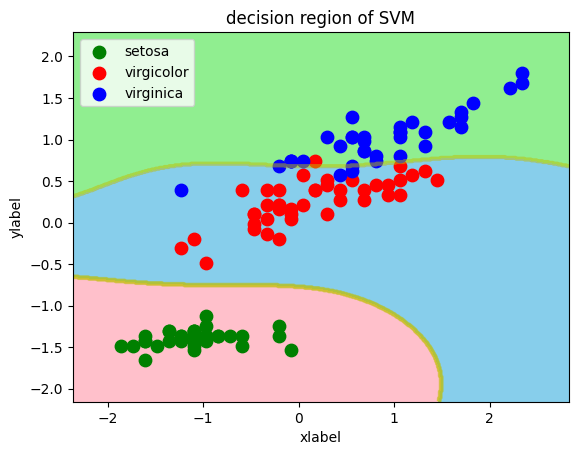

In [217]:
# visualizing data for SVM method for the 3 samples
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of SVM', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','virgicolor', 'virginica']):
    scatter_color = ['green', 'red','blue']
    contourf_color = ['pink', 'skyblue','lightgreen']
    n_class = 3
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,svm_model.fit(X_train, y_train))

#### Method 4: Decision Tree

In [218]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [219]:
y_predtree = tree.predict(X_test)
y_predtree

array([2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0])

In [220]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predtree))
print(confusion_matrix(y_test, y_predtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.88      0.88         8
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.95      0.95      0.95        38

[[16  0  0]
 [ 0  7  1]
 [ 0  1 13]]


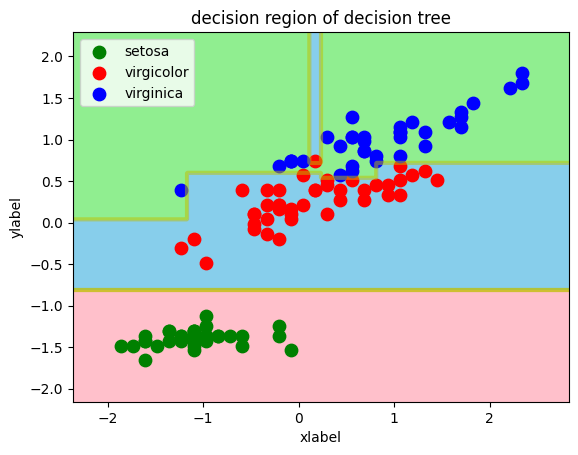

In [221]:
# visualizing data for decision tree method for the 3 samples
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of decision tree', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','virgicolor', 'virginica']):
    scatter_color = ['green', 'red','blue']
    contourf_color = ['pink', 'skyblue','lightgreen']
    n_class = 3
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,tree.fit(X_train, y_train))

#### Method 5: Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [223]:
y_predforest = forest.predict(X_test)
y_predforest

array([2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0])

In [224]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predforest))
print(confusion_matrix(y_test, y_predforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.70      0.88      0.78         8
           2       0.92      0.79      0.85        14

    accuracy                           0.89        38
   macro avg       0.87      0.89      0.87        38
weighted avg       0.91      0.89      0.90        38

[[16  0  0]
 [ 0  7  1]
 [ 0  3 11]]


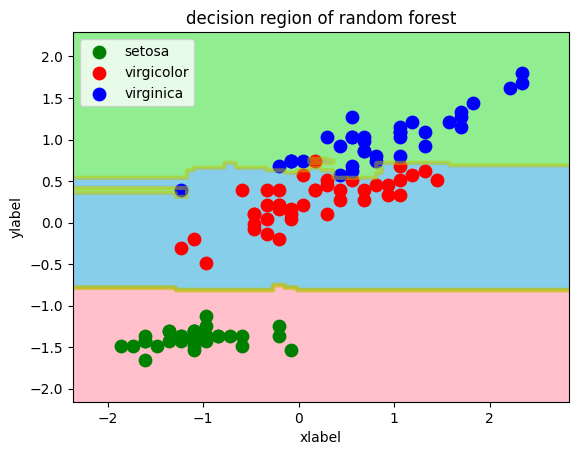

In [225]:
# visualizing data for random forest method for the 3 samples
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region of random forest', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','virgicolor', 'virginica']):
    scatter_color = ['green', 'red','blue']
    contourf_color = ['pink', 'skyblue','lightgreen']
    n_class = 3
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_train, y_train,forest.fit(X_train, y_train))